In [85]:
#preprocessing imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#modeling imports
import keras
import keras.metrics
from keras import layers
from tensorflow.python.keras.backend import get_session
from tensorflow import data as tf_data
from keras.models import Sequential

In [86]:
image_size = (180, 180)
batch_size = 128

In [87]:
#train test split
train_ds = keras.utils.image_dataset_from_directory(
    "chest_xray/train",
    label_mode="binary",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)

val_ds = keras.utils.image_dataset_from_directory(
    "chest_xray/val",
    label_mode="binary",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)

Found 5216 files belonging to 2 classes.
Found 16 files belonging to 2 classes.


In [88]:
test_ds = keras.utils.image_dataset_from_directory(
    "chest_xray/test",
    label_mode="binary",
    seed=1337,
    shuffle = False,
    image_size=image_size,
    batch_size=batch_size,
)

Found 624 files belonging to 2 classes.


2024-05-12 21:49:19.864843: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


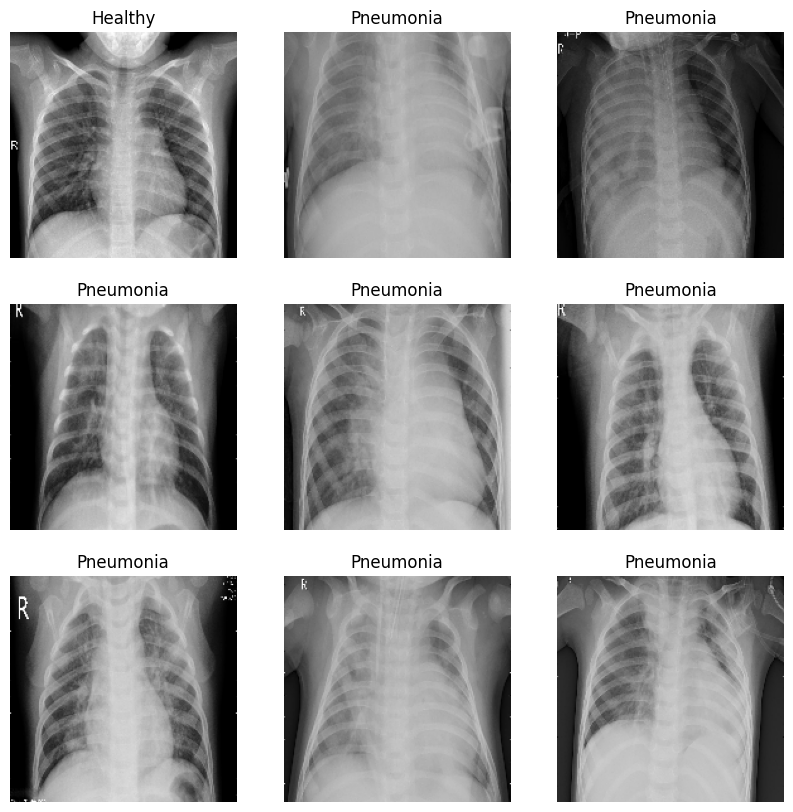

In [89]:
#test visualization
label = []
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(len(labels)):
        if labels[i] == 0:
            label.append('Healthy')
        else:
            label.append('Pneumonia')
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(np.array(images[i]).astype("uint8"))
        plt.title(label[i])
        plt.axis("off")

In [90]:
#series of random transformations to augment the data
rand_layers = [
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.05),
    layers.RandomZoom(0.05),
    layers.RandomTranslation(0.05, 0.05),
]

#apply the transformations to the images
def data_augmentation(images):
    for layer in rand_layers:
        images = layer(images)
    return images

2024-05-12 21:49:20.972631: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


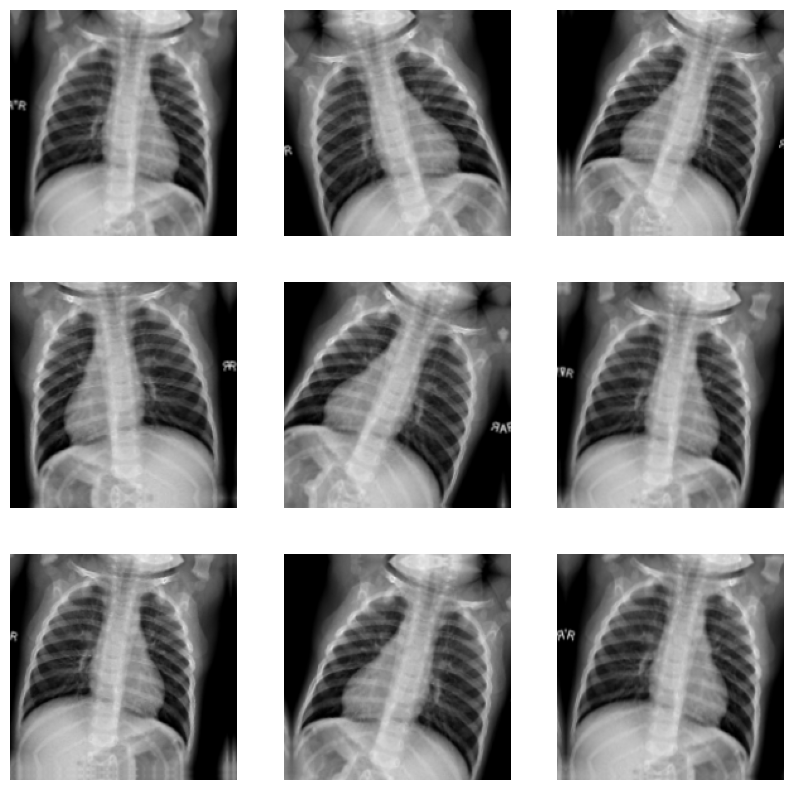

In [91]:
#show the augmented options for one image
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(np.array(augmented_images[0]).astype("uint8"))
        plt.axis("off")

In [92]:
train_ds = train_ds.map(
    lambda img, label: (data_augmentation(img), label),
    num_parallel_calls=tf_data.AUTOTUNE
)

In [93]:
alex = Sequential()

alex.add(layers.Conv2D(filters = 32, kernel_size = (11, 11), strides = (4,4), padding = 'valid', activation='relu', input_shape=(180, 180, 3)))
alex.add(layers.MaxPooling2D(pool_size = (3,3), strides = (2,2)))

alex.add(layers.Conv2D(filters = 192, kernel_size = (5, 5), padding = 'same', activation='relu'))
alex.add(layers.MaxPooling2D(pool_size = (3,3), strides = (2,2)))
alex.add(layers.Conv2D(filters = 384, kernel_size = (3, 3), padding = 'same', activation='relu'))
alex.add(layers.Conv2D(filters = 256, kernel_size = (3, 3), padding = 'same', activation='relu'))
alex.add(layers.MaxPooling2D(pool_size = (3,3), strides = (2,2)))

alex.add(layers.Flatten())
alex.add(layers.Dense(4096, activation='relu'))
alex.add(layers.Dense(1, activation='sigmoid'))

#keras.utils.plot_model(alex, show_shapes=True, to_file='alexnet.png')

In [94]:
vgg16 = Sequential()

vgg16.add(layers.Conv2D(filters = 64, kernel_size = (3, 3), padding = 'same', activation='relu', input_shape=(128, 128, 3)))
vgg16.add(layers.Conv2D(filters = 64, kernel_size = (3, 3), padding = 'same', activation='relu'))
vgg16.add(layers.MaxPooling2D(pool_size = (2,2), strides = (2,2), padding = 'same'))

vgg16.add(layers.Conv2D(filters = 128, kernel_size = (3, 3), padding = 'same', activation='relu'))
vgg16.add(layers.Conv2D(filters = 128, kernel_size = (3, 3), padding = 'same', activation='relu'))
vgg16.add(layers.MaxPooling2D(pool_size = (2,2), strides = (2,2), padding = 'same'))

vgg16.add(layers.Conv2D(filters = 256, kernel_size = (3, 3), padding = 'same', activation='relu'))
vgg16.add(layers.Conv2D(filters = 256, kernel_size = (3, 3), padding = 'same', activation='relu'))
vgg16.add(layers.Conv2D(filters = 256, kernel_size = (3, 3), padding = 'same', activation='relu'))
vgg16.add(layers.MaxPooling2D(pool_size = (2,2), strides = (2,2), padding = 'same'))

vgg16.add(layers.Conv2D(filters = 512, kernel_size = (3, 3), padding = 'same', activation='relu'))
vgg16.add(layers.Conv2D(filters = 512, kernel_size = (3, 3), padding = 'same', activation='relu'))
vgg16.add(layers.Conv2D(filters = 512, kernel_size = (3, 3), strides = (4,4), padding = 'same', activation='relu'))
vgg16.add(layers.MaxPooling2D(pool_size = (2,2), strides = (2,2), padding = 'same'))

vgg16.add(layers.Conv2D(filters = 512, kernel_size = (3, 3), padding = 'same', activation='relu'))
vgg16.add(layers.Conv2D(filters = 512, kernel_size = (3, 3), padding = 'same', activation='relu'))
vgg16.add(layers.Conv2D(filters = 512, kernel_size = (3, 3), strides = (4,4), padding = 'same', activation='relu'))
vgg16.add(layers.MaxPooling2D(pool_size = (2,2), strides = (2,2), padding = 'same'))

vgg16.add(layers.Flatten())
vgg16.add(layers.Dense(256, activation='relu'))
vgg16.add(layers.Dense(128, activation='relu'))
vgg16.add(layers.Dense(1, activation='sigmoid'))

#keras.utils.plot_model(vgg16, show_shapes=True, to_file='vgg16.png')


In [95]:
epochs = 20

callbacks = [
    keras.callbacks.ModelCheckpoint("alex_{epoch}.keras"),
]
alex.compile(
    optimizer=keras.optimizers.Adam(3e-4),
    loss=keras.losses.BinaryCrossentropy(from_logits=True),
    metrics=['accuracy', keras.metrics.Precision(), keras.metrics.Recall(), 
             keras.metrics.TruePositives(), keras.metrics.TrueNegatives(), keras.metrics.FalsePositives(), 
             keras.metrics.FalseNegatives()]
)
alex.fit(
    train_ds,
    epochs=epochs,
    callbacks=callbacks,
    validation_data=val_ds,
)

Epoch 1/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 32s 718ms/step - accuracy: 0.6526 - false_negatives_6: 393.5714 - false_positives_6: 525.4048 - loss: 8.9642 - precision_6: 0.7644 - recall_6: 0.7738 - true_negatives_6: 177.6667 - true_positives_6: 1650.7858 - val_accuracy: 0.5625 - val_false_negatives_6: 1.0000 - val_false_positives_6: 6.0000 - val_loss: 0.4836 - val_precision_6: 0.5385 - val_recall_6: 0.8750 - val_true_negatives_6: 2.0000 - val_true_positives_6: 7.0000
Epoch 2/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 32s 750ms/step - accuracy: 0.8893 - false_negatives_6: 114.2857 - false_positives_6: 187.7143 - loss: 0.2965 - precision_6: 0.9112 - recall_6: 0.9435 - true_negatives_6: 523.0714 - true_positives_6: 1922.3572 - val_accuracy: 0.8125 - val_false_negatives_6: 1.0000 - val_false_positives_6: 2.0000 - val_loss: 0.3291 - val_precision_6: 0.7778 - val_recall_6: 0.8750 - val_true_negatives_6: 6.0000 - val_true_positives_6: 7.0000
Epoch 3/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 33s 779ms/step - accuracy: 0.9030 

In [96]:
epochs = 20

callbacks = [
    keras.callbacks.ModelCheckpoint("vgg16_{epoch}.keras"),
]
vgg16.compile(
    optimizer=keras.optimizers.Adam(3e-4),
    loss=keras.losses.BinaryCrossentropy(from_logits=True),
    metrics=['accuracy', keras.metrics.Precision(), keras.metrics.Recall(), 
             keras.metrics.TruePositives(), keras.metrics.TrueNegatives(), keras.metrics.FalsePositives(), 
             keras.metrics.FalseNegatives()]
)
vgg16.fit(
    train_ds,
    epochs=epochs,
    callbacks=callbacks,
    validation_data=val_ds,
)

Epoch 1/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 946s 23s/step - accuracy: 0.7499 - false_negatives_7: 0.0000e+00 - false_positives_7: 702.0000 - loss: 0.7489 - precision_7: 0.7499 - recall_7: 1.0000 - true_negatives_7: 0.0000e+00 - true_positives_7: 2045.4286 - val_accuracy: 0.5000 - val_false_negatives_7: 0.0000e+00 - val_false_positives_7: 8.0000 - val_loss: 0.8177 - val_precision_7: 0.5000 - val_recall_7: 1.0000 - val_true_negatives_7: 0.0000e+00 - val_true_positives_7: 8.0000
Epoch 2/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 951s 23s/step - accuracy: 0.7445 - false_negatives_7: 0.0000e+00 - false_positives_7: 704.1190 - loss: 0.5857 - precision_7: 0.7445 - recall_7: 1.0000 - true_negatives_7: 0.0000e+00 - true_positives_7: 2043.3096 - val_accuracy: 0.5000 - val_false_negatives_7: 0.0000e+00 - val_false_positives_7: 8.0000 - val_loss: 0.7536 - val_precision_7: 0.5000 - val_recall_7: 1.0000 - val_true_negatives_7: 0.0000e+00 - val_true_positives_7: 8.0000
Epoch 3/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 953s 23s/ste

In [97]:
alex_pred = alex.predict(test_ds)

4/5 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/stepWARNING:tensorflow:5 out of the last 11 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x3054af0d0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 243ms/step


In [98]:
vgg16_pred = vgg16.predict(test_ds)

5/5 ━━━━━━━━━━━━━━━━━━━━ 33s 7s/step


In [99]:
alex_test_acc = alex.evaluate(test_ds, verbose=1)
alex_test_acc

5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 239ms/step - accuracy: 0.6097 - false_negatives_6: 3.1667 - false_positives_6: 132.8333 - loss: 1.2718 - precision_6: 0.4595 - recall_6: 0.8238 - true_negatives_6: 83.5000 - true_positives_6: 201.8333       


[0.7925000190734863,
 0.7596153616905212,
 0.7281368970870972,
 0.9820512533187866,
 383.0,
 91.0,
 143.0,
 7.0]

In [100]:
test_results = pd.DataFrame(alex_test_acc, index = ['loss', 'accuracy', 'precision', 'recall', 
             'TP', 'TN', 'FP', 'FN'], columns=['AlexNet'])
test_results

,AlexNet
loss,0.792500
accuracy,0.759615
precision,0.728137
recall,0.982051
TP,383.000000
TN,91.000000
FP,143.000000
FN,7.000000


In [101]:
vgg16_test_acc = vgg16.evaluate(test_ds, verbose=1)
vgg16_test_acc

5/5 ━━━━━━━━━━━━━━━━━━━━ 35s 7s/step - accuracy: 0.8034 - false_negatives_7: 8.3333 - false_positives_7: 66.5000 - loss: 0.5708 - precision_7: 0.5562 - recall_7: 0.8007 - true_negatives_7: 149.8333 - true_positives_7: 196.6667         


[0.4019608497619629,
 0.8541666865348816,
 0.8344519138336182,
 0.9564102292060852,
 373.0,
 160.0,
 74.0,
 17.0]

In [102]:
test_results['VGG16'] = vgg16_test_acc
test_results

,AlexNet,VGG16
loss,0.792500,0.401961
accuracy,0.759615,0.854167
precision,0.728137,0.834452
recall,0.982051,0.956410
TP,383.000000,373.000000
TN,91.000000,160.000000
FP,143.000000,74.000000
FN,7.000000,17.000000
